In [1]:
# Importing required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings("ignore")

C:\Users\NitBrok\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\NitBrok\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\NitBrok\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Reading CSV Data
df = pd.read_csv("Car details.csv")

In [3]:
# Glimpse of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# shape
df.shape

(8128, 13)

In [5]:
# informtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# Data types of the columns
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:
# Columns with any null values
df.isnull().sum() > 0

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [8]:
# Checking rows with null values
df[df.isnull().any(axis = 1)].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dropping and resetting index for the rows which have null values
df.dropna(axis = 0, inplace = True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
# Extracting out values from mileage, engine and max_power columns
df['mileage'] = df['mileage'].replace(["kmpl","km/kg"], "", regex = True).astype(float)
df['engine'] = df['engine'].replace("CC", "", regex = True).astype(int)
df['max_power'] = df['max_power'].replace("bhp", "", regex = True).astype(float)

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
# Getting car age with respect to current year and dropping Torque
df['car_age'] = 2021 - df['year']
df.drop(['torque'], axis = 1, inplace = True)

In [14]:
# Fetching Final Dataset from the Dataframe
final_dataset = df[['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 
                    'owner', 'mileage', 'engine', 'max_power', 'seats', 'car_age']]

In [15]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,14


In [16]:
# Checking Categorical Columns
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [17]:
# Handling Categorical variables by making dummy dataframe
final_dataset = pd.get_dummies(final_dataset, drop_first = True)
final_dataset.head()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248,74.00,5.0,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498,103.52,5.0,7,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497,78.00,5.0,15,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396,90.00,5.0,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298,88.20,5.0,14,0,0,1,1,0,1,0,0,0,0


In [18]:
# Getting Features in X and Target in Y
X = final_dataset.drop(['selling_price'], axis = 1)
Y = final_dataset['selling_price']
X.head()

,km_driven,mileage,engine,max_power,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248,74.00,5.0,7,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498,103.52,5.0,7,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497,78.00,5.0,15,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396,90.00,5.0,11,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298,88.20,5.0,14,0,0,1,1,0,1,0,0,0,0


In [19]:
Y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [20]:
# Splitting the final dataset into training and testing set with 30% data in test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5534, 16)
y_train shape:  (5534,)
X_test shape:  (2372, 16)
y_test shape:  (2372,)


In [21]:
# Using ExtraTreesRegressor to find top 5 features
featureImpModel = ExtraTreesRegressor()
featureImpModel.fit(X_train, y_train)

ExtraTreesRegressor()

In [22]:
print("Feature Importance: ", featureImpModel.feature_importances_)

Feature Importance:  [4.80948423e-02 2.70899350e-02 7.76814191e-02 3.15202171e-01
 1.25177540e-02 1.41696023e-01 2.41787907e-02 6.62484844e-06
 2.15808971e-02 2.25348129e-02 6.28614216e-04 2.88586792e-01
 2.21588432e-04 1.04004530e-02 8.81666256e-03 7.62619598e-04]


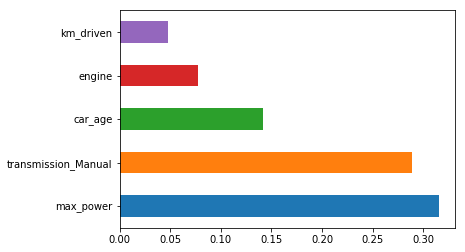

In [23]:
# Plotting the feature importance graph
extraTreeFeatureImp = featureImpModel.feature_importances_
feature_names = X_train.columns
featureImp = pd.Series(extraTreeFeatureImp, index=feature_names)
featureImp.nlargest(5).plot(kind = 'barh')

In [24]:
# Creating Random Forest Model
rfModel = RandomForestRegressor()
rfModel.fit(X_train, y_train)

RandomForestRegressor()

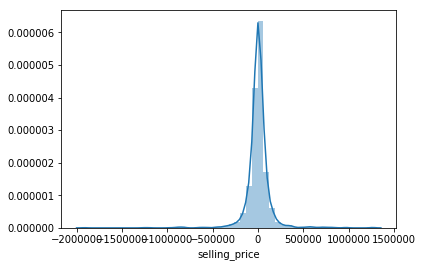

In [25]:
# Getting results from Random Forest
rf_pred = rfModel.predict(X_test)
sns.distplot(rf_pred - y_test)

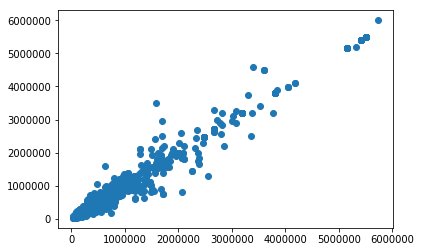

In [26]:
plt.scatter(rf_pred, y_test)

In [27]:
# Creating Adaboost Model
adaModel = AdaBoostRegressor()
adaModel.fit(X_train, y_train)

AdaBoostRegressor()

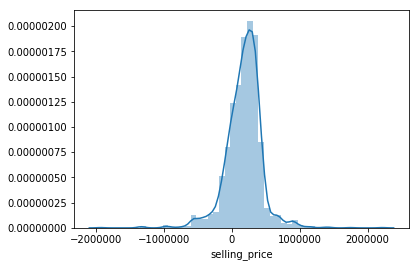

In [28]:
# Getting results from Adaboost
ada_pred = adaModel.predict(X_test)
sns.distplot(ada_pred - y_test)

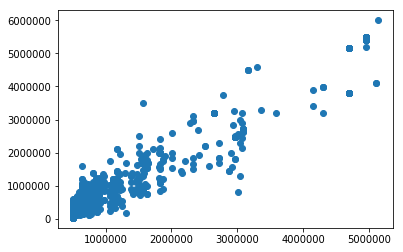

In [29]:
plt.scatter(ada_pred, y_test)

In [30]:
# Combining Random Forest and Adaboost to make Stacking ensemble
estimators = [
    ('rf', RandomForestRegressor()),
    ('ada', AdaBoostRegressor())
]
stackedModel = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stackedModel.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('ada', AdaBoostRegressor())],
                  final_estimator=RandomForestRegressor())

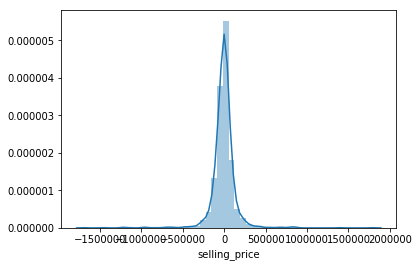

In [31]:
# Getting results from Stacking model
stack_pred = stackedModel.predict(X_test)
sns.distplot(stack_pred - y_test)

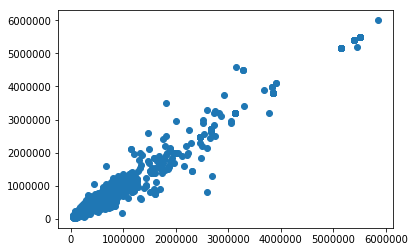

In [33]:
plt.scatter(stack_pred, y_test)